# Introduction  
In this week's tpp, I have a more in-depth study of my sub question. My sub question is how many steps do you need in a week to meet the average daily amount of exercise.  
(beginning date：07/10/2022, end date： 07/10/2022, author: Tiannan Chen)

## Importing external packages    
in this notebook, we need to import numpy, csv, pandas, datetimeand matplotlib.pyplot package.  
(beginning date：07/10/2022, end date： 07/10/2022, author: Tiannan Chen)

In [18]:
"(beginning date：07/10/2022, end date： 07/10/2022, author: Tiannan Chen)"
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from datetime import date

## First look at the data and clean the data  
This data set 3 belongs to raw data, so we need to clean up this raw data. I found that there are a lot of "0" data in this data set. The test taker really didn't walk that day, so I don't think these "0" data can be removed directly.  
(beginning date：07/10/2022, end date： 07/10/2022, author: Tiannan Chen)

In [42]:
"(beginning date：07/10/2022, end date： 07/10/2022, author: Tiannan Chen)"
#get the raw data from the github
url = "https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-03.csv?token=GHSAT0AAAAAAAAAHGMVU2TXURUSK4J4YK2QY2BNZZA"
# use panda to read this csv
data = pd.read_csv(url)
#show the data
data

,Start,Finish,Steps (count)
0,31/12/2021 23:00,01/01/2022 0:00,0.000000
1,01/01/2022 0:00,01/01/2022 1:00,14.000000
2,01/01/2022 1:00,01/01/2022 2:00,0.000000
3,01/01/2022 2:00,01/01/2022 3:00,0.000000
4,01/01/2022 3:00,01/01/2022 4:00,0.000000
...,...,...,...
6015,08/09/2022 13:00,08/09/2022 14:00,0.000000
6016,08/09/2022 14:00,08/09/2022 15:00,893.959035
6017,08/09/2022 15:00,08/09/2022 16:00,534.040965
6018,08/09/2022 16:00,08/09/2022 17:00,390.020268


# Change date format  
Because in raw data, the date format of some datasets will be different, so I process the time data here, so that the format is yyyy-mm-dd.  
(beginning date：07/10/2022, end date： 07/10/2022, author: Tiannan Chen)

In [43]:
"(beginning date：07/10/2022, end date： 07/10/2022, author: Tiannan Chen)"
#change foramt to datetime
data['Start'] = pd.to_datetime(data['Start'])
#change the datetime format as yyyy-mm-dd
data['Start'] = data['Start'].dt.strftime('%Y/%m/%d')
#group by start time and count the steps
day_data = data.groupby(['Start']).sum()
#show the data
day_data

,Steps (count)
Start,
2021/12/31,0.000000
2022/01/01,1614.000000
2022/01/02,43.000000
2022/01/03,7461.000000
2022/01/04,9360.999999
...,...
2022/12/04,9169.000001
2022/12/05,4571.000000
2022/12/06,2733.000000


Because after the above data processing, the data set is missing index, so we need to add index.  
(beginning date：07/10/2022, end date： 07/10/2022, author: Tiannan Chen)

In [44]:
"(beginning date：07/10/2022, end date： 07/10/2022, author: Tiannan Chen)"
# add index
day_data = day_data.reset_index(drop=False)
day_data

,Start,Steps (count)
0,2021/12/31,0.000000
1,2022/01/01,1614.000000
2,2022/01/02,43.000000
3,2022/01/03,7461.000000
4,2022/01/04,9360.999999
...,...,...
247,2022/12/04,9169.000001
248,2022/12/05,4571.000000
249,2022/12/06,2733.000000
250,2022/12/07,11521.999999


Because the weekly data needs to be obtained, the resample function can be used to easily integrate the weekly data, and then use the sum to find the number of steps taken in a week.  
(beginning date：07/10/2022, end date： 07/10/2022, author: Tiannan Chen)

In [46]:
"(beginning date：07/10/2022, end date： 07/10/2022, author: Tiannan Chen)"
#first change the data type to datetime
day_data['Start'] = pd.to_datetime(day_data['Start'])
#use resample to integrate the data into weekly
week_data = day_data.resample('W', on="Start").sum()
#show the data
week_data

,Steps (count)
Start,
2022-01-02,1657.000000
2022-01-09,52916.000000
2022-01-16,9211.999999
2022-01-23,2573.000000
2022-01-30,15576.000000
2022-02-06,52466.000002
2022-02-13,20252.000000
2022-02-20,75358.999999
2022-02-27,52144.000000


After getting the data for each week, we still don't know which week the data is, so I added numbers to record each week.  
(beginning date：07/10/2022, end date： 07/10/2022, author: Tiannan Chen)

In [47]:
"(beginning date：07/10/2022, end date： 07/10/2022, author: Tiannan Chen)"
#added numbers to record each week
week_data['weeks'] = range(len(week_data))
#show the data
week_data

,Steps (count),weeks
Start,,
2022-01-02,1657.000000,0
2022-01-09,52916.000000,1
2022-01-16,9211.999999,2
2022-01-23,2573.000000,3
2022-01-30,15576.000000,4
2022-02-06,52466.000002,5
2022-02-13,20252.000000,6
2022-02-20,75358.999999,7
2022-02-27,52144.000000,8


# Data visualization
Finally I drew a graph to show the results, the x-axis is the week, and the y-axis is the total number of steps taken in that week, the red line represents the number of steps taken for the recommended exercise per week, because it is not possible to determine the number of steps taken by the person being tested. Age and gender, so there will be some errors in the standard definition.  
(beginning date：07/10/2022, end date： 07/10/2022, author: Tiannan Chen)

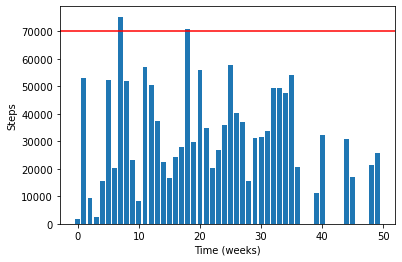

In [55]:
"(beginning date：07/10/2022, end date： 07/10/2022, author: Tiannan Chen)"
# the x-axis data
x = week_data['weeks']
# the y-axis data
y = week_data['Steps (count)']
# use bar plot
plt.bar(x,y)
# name the x-axis
plt.xlabel('Time (weeks)')
# name the y-axis
plt.ylabel('Steps')
# set the standard line and colored red
plt.axhline(70000, color = "r")
#show the plot
plt.show()

# conclusion  
It can be seen that there are many days of data loss in the data, and the set standard of 70,000 steps a week can only be seen in this data set for two weeks.  
(beginning date：07/10/2022, end date： 07/10/2022, author: Tiannan Chen)